In [74]:
import pandas as pd
data = pd.read_csv('ev_data_clean.csv', thousands=',')
data.head()

,County,LeaseVsPurchase,Vehicle Category,Make,Purchase Date,AgeGroup,Gender,Education,HousingType,RentOrOwn,Income
0,Orange,Lease,PHEV,Toyota,9/1/12,55.0,Male,Graduate degree,Detached House,Own,175000.0
1,Los Angeles,Lease,PHEV,Chevrolet,9/1/12,35.0,Male,Graduate degree,Detached House,Own,250000.0
2,Los Angeles,Lease,PHEV,Toyota,9/1/12,45.0,Male,Bachelor's degree,Detached House,Own,125000.0
3,Sacramento,Lease,BEV,Nissan,9/1/12,65.0,Female,Bachelor's degree,Detached House,Own,75000.0
4,Sonoma,Purchase,BEV,Nissan,9/1/12,45.0,Female,Graduate degree,Detached House,Own,175000.0


In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19460 entries, 0 to 19459
Data columns (total 11 columns):
County              19460 non-null object
LeaseVsPurchase     19460 non-null object
Vehicle Category    19460 non-null object
Make                19460 non-null object
Purchase Date       19460 non-null object
AgeGroup            18616 non-null float64
Gender              18675 non-null object
Education           18863 non-null object
HousingType         19049 non-null object
RentOrOwn           18858 non-null object
Income              15432 non-null float64
dtypes: float64(2), object(9)
memory usage: 1.6+ MB


In [76]:
data['Purchase Date'] = pd.to_datetime(data['Purchase Date'])
data['Purchase Date'].head()

data['Month_Year']   = data['Purchase Date'].apply(lambda x: x.strftime('%Y-%m'))
data['BiMonth_Year'] = data['Month_Year'].apply(lambda x: x[:5]+str(int(x[-2:])+int(x[-2:])%2).zfill(2))
data['Half_Year']    = data['Month_Year'].apply(lambda x: float(x[:4]) if int(x[-2:])<6 else float(x[:4])+0.5)
data['Month']      = data['Purchase Date'].dt.month
data['Year']       = data['Purchase Date'].dt.year
data['Weekday']    = data['Purchase Date'].dt.weekday
data['Year']       = data['Purchase Date'].dt.year 
data.Month_Year.head(n=2)

0    2012-09
1    2012-09
Name: Month_Year, dtype: object

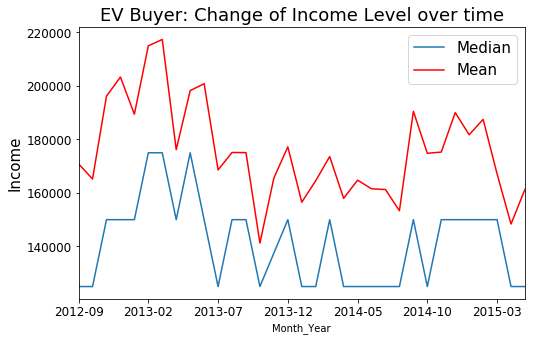

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

fig,ax = plt.subplots(ncols=1, figsize=(8,5))
data.groupby('Month_Year')['Income'].median().plot(ax=ax, label='Median', fontsize=12)
data.groupby('Month_Year')['Income'].mean().plot(ax=ax,color='r', label='Mean')
#data.groupby('Month_Year')['Income'].std().plot(ax=ax,color='m', label='Std')
ax.set_ylabel('Income', fontsize=15)
ax.set_title('EV Buyer: Change of Income Level over time', fontsize=18)
_ = ax.legend(loc='best', fontsize=15)

['Los Angeles', 'Santa Clara', 'Orange', 'San Diego', 'Alameda'] ['Napa', 'Stanislaus', 'Humboldt', 'Mendocino', 'Merced'] ['Alpine', 'Sierra', 'Inyo', 'Glenn', 'Plumas']


Text(0.5,1,'Fraction of Sales for the Bottom5 County')

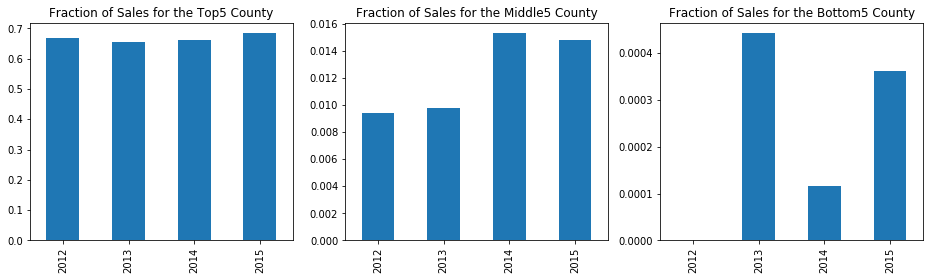

In [29]:
top5_County    = list(data.County.value_counts()[:5].index) #axes[0])
mid5_County    = list(data.County.value_counts()[25:30].index)
bottom5_County = list(data.County.value_counts()[-5:].index)
print(top5_County, mid5_County, bottom5_County)
fig,ax=plt.subplots(ncols=3, figsize=(16,4))
ids_sub = [x in top5_County for x in data.County]
data_subset = data[ids_sub]
(data_subset.Year.value_counts()/data.Year.value_counts()).sort_index().plot.bar(ax=ax[0])
ax[0].set_title('Fraction of Sales for the Top5 County')

ids_sub = [x in mid5_County for x in data.County]
data_subset = data[ids_sub]
(data_subset.Year.value_counts()/data.Year.value_counts()).sort_index().plot.bar(ax=ax[1])
ax[1].set_title('Fraction of Sales for the Middle5 County')

ids_sub = [x in bottom5_County for x in data.County]
data_subset = data[ids_sub]
(data_subset.Year.value_counts()/data.Year.value_counts()).sort_index().plot.bar(ax=ax[2])
ax[2].set_title('Fraction of Sales for the Bottom5 County')

In [8]:
data.Make.value_counts()

Chevrolet    4140
Nissan       3670
Tesla        3293
Ford         2535
Toyota       2418
FIAT         1774
Other        1203
BMW           427
Name: Make, dtype: int64

Text(0.5,1,'Average Sales per Month')

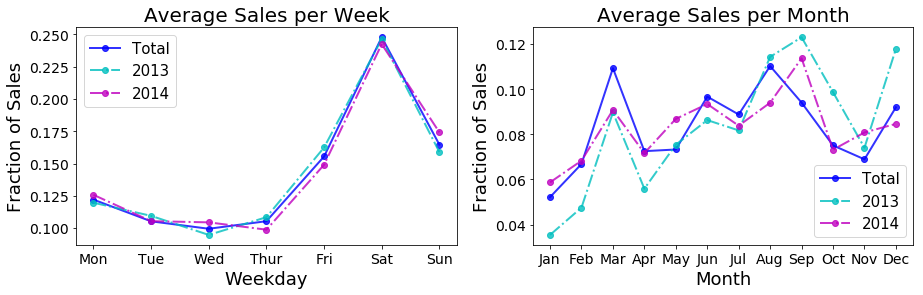

In [32]:
####Sales plots
data_sub_2012 = data.loc[data.Year == 2012]
data_sub_2013 = data.loc[data.Year == 2013]
data_sub_2014 = data.loc[data.Year == 2014]
data_sub_2015 = data.loc[data.Year == 2015]

sales_tot_Week  = data['Weekday'].value_counts()/data.groupby('Weekday')['Year'].nunique()
sales_2013_Week = data_sub_2013['Weekday'].value_counts().sort_index()
sales_2014_Week = data_sub_2014['Weekday'].value_counts().sort_index()

fig,ax = plt.subplots(ncols=2, figsize=(15,4))
ax[0].plot(sales_tot_Week /sales_tot_Week.sum(), 'bo-',lw=2, alpha=0.8, label='Total')
ax[0].plot(sales_2013_Week/sales_2013_Week.sum(),'co-.',lw=2, alpha=0.8, label='2013')
ax[0].plot(sales_2014_Week/sales_2014_Week.sum(),'mo-.',lw=2, alpha=0.8, label='2014')
ax[0].set_xlabel('Weekday', fontsize=18)
ax[0].set_ylabel('Fraction of Sales', fontsize=18)
ax[0].set_xticks((range(7)))
ax[0].legend(loc='best', fontsize=15)
ax[0].set_xticklabels(['Mon', 'Tue','Wed','Thur','Fri','Sat','Sun'], fontsize=14)
ax[0].tick_params(axis='y', labelsize=14)
ax[0].set_title('Average Sales per Week',fontsize=20)

sales_tot_Month  = data['Month'].value_counts()/data.groupby('Month')['Year'].nunique()
sales_2013_Month = data_sub_2013['Month'].value_counts().sort_index()
sales_2014_Month = data_sub_2014['Month'].value_counts().sort_index()

ax[1].plot(sales_tot_Month /sales_tot_Month.sum(),  'bo-', lw=2, alpha=0.8, label='Total')
ax[1].plot(sales_2013_Month/sales_2013_Month.sum(), 'co-.',lw=2, alpha=0.8, label='2013')
ax[1].plot(sales_2014_Month/sales_2014_Month.sum(), 'mo-.',lw=2, alpha=0.8, label='2014')

ax[1].set_xlabel('Month', fontsize=18)
ax[1].set_ylabel('Fraction of Sales', fontsize=18)
ax[1].set_xticks((range(1,13)))
ax[1].set_xticklabels(['Jan', 'Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], fontsize=14)
ax[1].tick_params(axis='y', labelsize=14)
ax[1].legend(loc='best', fontsize=15)
ax[1].set_title('Average Sales per Month', fontsize=20)

Text(0.5,1,'Sales for Different EV type')

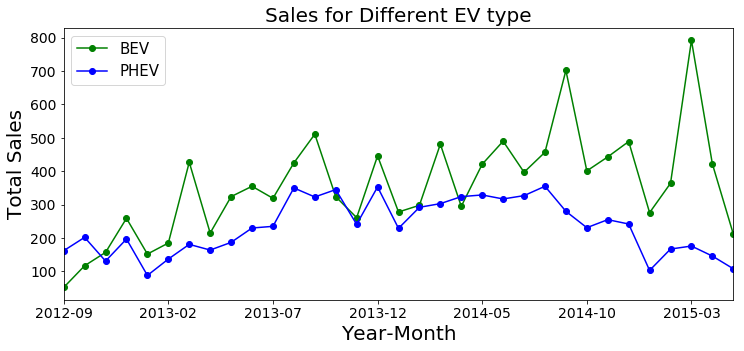

In [10]:
bev_sales  = data.loc[data['Vehicle Category'] == 'BEV',  'Month_Year']
phev_sales = data.loc[data['Vehicle Category'] == 'PHEV', 'Month_Year']

fig,ax = plt.subplots(figsize=(12,5))
bev_sales.value_counts().sort_index().plot(ax=ax,  style='go-', label='BEV', fontsize=14)
phev_sales.value_counts().sort_index().plot(ax=ax, style='bo-', label='PHEV', fontsize=14)
ax.legend(loc='best',fontsize=15)
ax.set_xlabel('Year-Month', fontsize=20)
ax.set_ylabel('Total Sales',fontsize=20)
ax.set_title('Sales for Different EV type', fontsize=20)

Text(0.5,1,'EV Sales in Different Age Group')

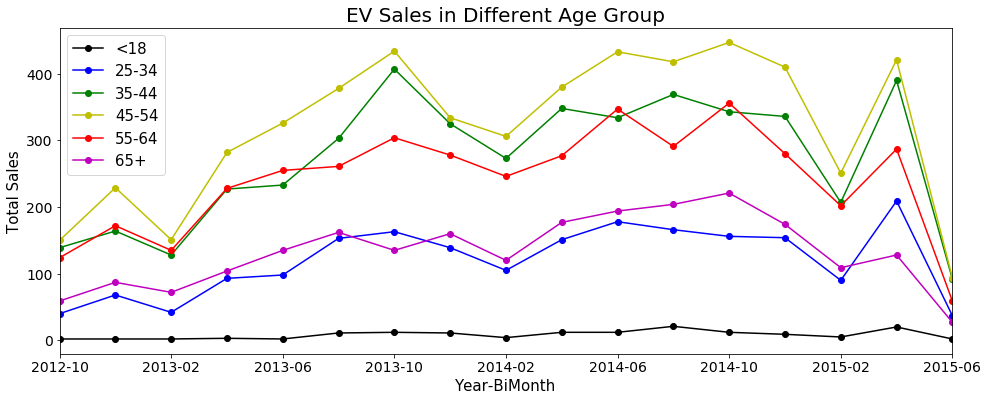

In [33]:
#age_25  = data.loc[data['AgeGroup'] == 25.0,  'Month_Year']
#age_35  = data.loc[data['AgeGroup'] == 35.0,  'Month_Year']
from matplotlib import cm
colors = {'18.0': 'k', '25.0':'b', '35.0':'g','45.0':'y', '55.0':'r', '65.0':'m'}
labels = {'18.0': '<18', '25.0':'25-34', '35.0':'35-44','45.0':'45-54', '55.0':'55-64', '65.0':'65+'}
fig,ax = plt.subplots(ncols=1, figsize=(15,6))

for age in sorted(data['AgeGroup'].dropna().unique()):
    age_group = data.loc[data['AgeGroup'] == age, 'BiMonth_Year']
    age_group.value_counts().sort_index().plot(ax=ax, style='-o', color=colors[str(age)], 
        figsize=(16,6), label=labels[str(age)], fontsize=14)
#age_35.value_counts().sort_index().plot(ax=ax, style='ro-', figsize=(16,6), label='35', fontsize=14)
ax.legend(loc='best',fontsize=15)
ax.set_xlabel('Year-BiMonth', fontsize=15)
ax.set_ylabel('Total Sales', fontsize=15)
ax.set_title('EV Sales in Different Age Group', fontsize=20)

['Toyota' 'Chevrolet' 'Nissan' 'Ford' 'Other' 'Tesla' 'FIAT' 'BMW']


Text(0,0.5,'Bi-Annual Fraction of Total Sales')

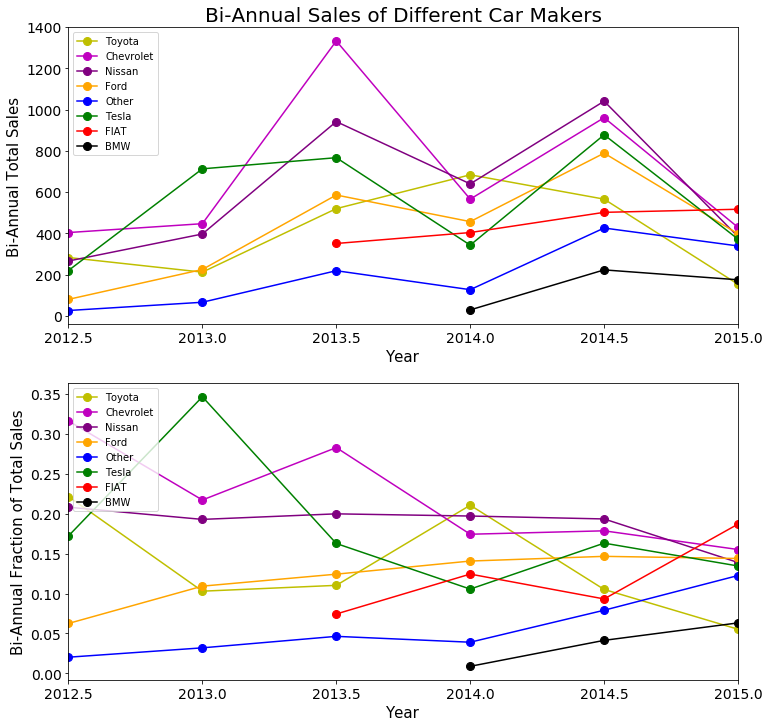

In [34]:
Make = data.Make.unique()
print(Make)
colors = {'BMW': 'k', 'Other':'b', 'FIAT':'r','Toyota':'y', 'Ford':'orange', 'Tesla':'g', 'Nissan':'purple', 'Chevrolet':'m'}
fig,ax = plt.subplots(nrows=2, figsize=(12,12))
for make in Make:
    make_group = data.loc[data['Make'] == make, 'Half_Year']
    make_group.value_counts().sort_index().plot(ax=ax[0],
                style='-o', ms=8, color=colors[make], label=make, fontsize=14)
ax[0].legend(loc='upper left',fontsize=10)
ax[0].set_xlabel('Year', fontsize=15)
ax[0].set_ylabel('Bi-Annual Total Sales', fontsize=15)
ax[0].set_title('Bi-Annual Sales of Different Car Makers',fontsize=20)
for make in Make:
    make_group = data.loc[data['Make'] == make, 'Half_Year']
    (make_group.value_counts().sort_index()/data.Half_Year.value_counts().sort_index()).plot(ax=ax[1],
                style='-o', ms=8, color=colors[make],label=make, fontsize=14)
ax[1].legend(loc='upper left',fontsize=10)
ax[1].set_xlabel('Year', fontsize=15)
ax[1].set_ylabel('Bi-Annual Fraction of Total Sales', fontsize=15)
#ax[1].set_title('Bi-Annual Sales of Different Car Makers',fontsize=20)

2012    1279
2013    6778
2014    8636
2015    2767
Name: Year, dtype: int64


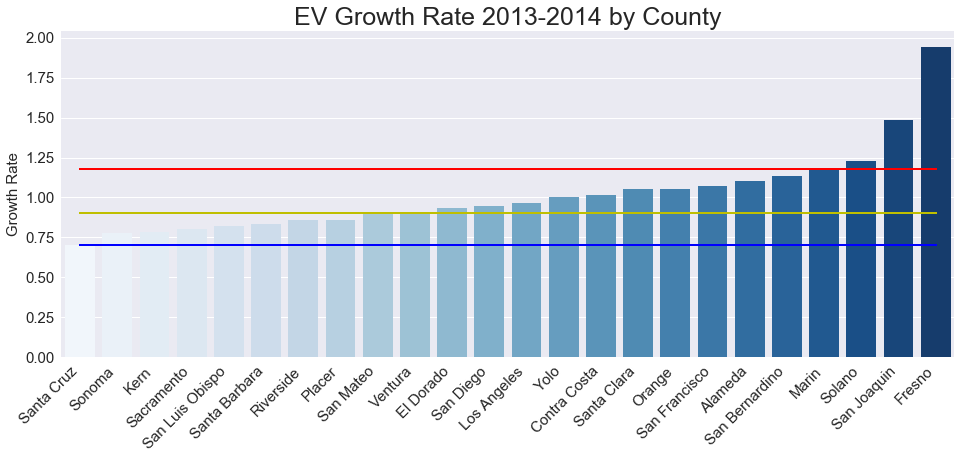

In [94]:
#Identify Counties with 
from collections import defaultdict
import seaborn as sns
print(data.Year.value_counts().sort_index())
County_names = data.County.unique()
County_growth_dic = defaultdict(float)
for county in County_names:
    sales_ratio = data.loc[data.County == county, 'Year'].value_counts().sort_index()/data.Year.value_counts().sort_index()
    if sales_ratio.values[1] > 0.005: #ignore the county with less than 34 cars in 2013
        County_growth_dic[county] = sales_ratio.values[2]/sales_ratio.values[1]  #2014 vs 2013
dic_sort = sorted(County_growth_dic.items(), key=lambda x:x[1])  #list of tuples
plt.figure(figsize=(16,6))
g = sns.barplot(*zip(*dic_sort), palette="Blues")
_ = g.set_xticklabels(g.get_xticklabels(), ha="right", rotation=45, fontsize=15)
plt.ylabel('Growth Rate', fontsize=15)
plt.yticks(fontsize=15)
plt.title('EV Growth Rate 2013-2014 by County', fontsize=25)
plt.plot(list(zip(*dic_sort))[0], len(dic_sort)*[1.18], 'r') #fast growth
plt.plot(list(zip(*dic_sort))[0], len(dic_sort)*[0.9], 'y')  #medium
plt.plot(list(zip(*dic_sort))[0], len(dic_sort)*[0.7], 'b')  #slow

In [90]:
print(list(zip(*dic_sort))[0])

('Santa Cruz', 'Sonoma', 'Kern', 'Sacramento', 'San Luis Obispo', 'Santa Barbara', 'Riverside', 'Placer', 'San Mateo', 'Ventura', 'El Dorado', 'San Diego', 'Los Angeles', 'Yolo', 'Contra Costa', 'Santa Clara', 'Orange', 'San Francisco', 'Alameda', 'San Bernardino', 'Marin', 'Solano', 'San Joaquin', 'Fresno')


In [56]:
print(sorted(list(County_growth_dic.values())))

[0.70223787815996686, 0.77958662194466122, 0.78485409911996296, 0.80055118110236223, 0.81897819038604824, 0.8363199416852064, 0.85805292701716163, 0.86050268698694732, 0.89816050075347886, 0.89827232153614256, 0.93435011799995582, 0.94684798517832336, 0.96524776089121811, 1.0038831500371619, 1.0144965947883966, 1.0497942659128394, 1.0519683093246561, 1.0692215263373408, 1.102570588142473, 1.1351195648429215, 1.180881396841045, 1.2307939281653966, 1.4825021872265967, 1.9442976546380901]


In [58]:
import urllib.request
#import ast
#from html.parser import HTMLParser
#import string
import json

url = 'http://catalog.civicdashboards.com/dataset/ce409ee1-5128-4b66-aa3e-957dbd4de8ba/resource/6f805645-0836-478d-b168-c1f72d53b4f3/download/5faf934922fd4748a843d55990297d9ftemp.geojson'
headers={'User-Agent':"Mozilla/5.0"}
#headers={'User-Agent':"Magic Browser"}
req=urllib.request.Request(url,None,headers) #The assembled request
calif_data = urllib.request.urlopen(req).read()
calif_data = json.loads(calif_data)

county_names = []
county_names_dict = {}

for county in calif_data['features']:
    for m in range(len(county['properties']['name'])):
        if county['properties']['name'][m:m+6] == 'County':
            county_names.append(county['properties']['name'][0:m-1])
            #county_names_dict[county['properties']['name'][0:m-1]] = county['properties']['name']
            
print(county_names)

['Humboldt', 'El Dorado', 'Merced', 'Santa Cruz', 'Santa Barbara', 'Sierra', 'Placer', 'Del Norte', 'Glenn', 'Lake', 'Alameda', 'Inyo', 'Kings', 'Napa', 'Marin', 'Nevada', 'Sutter', 'Mariposa', 'Mono', 'Contra Costa', 'San Diego', 'San Luis Obispo', 'Santa Clara', 'Tuolumne', 'Yolo', 'San Mateo', 'Tulare', 'Madera', 'Mendocino', 'San Francisco', 'Solano', 'Monterey', 'Stanislaus', 'Imperial', 'San Benito', 'Sonoma', 'Yuba', 'Sacramento', 'Amador', 'Plumas', 'Modoc', 'Tehama', 'Colusa', 'Siskiyou', 'Fresno', 'Alpine', 'Orange', 'Lassen', 'Butte', 'Ventura', 'Calaveras', 'San Joaquin', 'Trinity', 'Kern', 'Riverside', 'Los Angeles', 'Shasta', 'San Bernardino']


In [64]:
fast_counties = []
mid_counties  = []
slow_counties = []
other_counties= []
for k,county in enumerate(county_names):
    if County_growth_dic[county] > 1.18: fast_counties.append(calif_data['features'][k])    
    elif County_growth_dic[county] > 0.9: mid_counties.append(calif_data['features'][k])
    elif County_growth_dic[county] > 0.7: slow_counties.append(calif_data['features'][k])    
    else: other_counties.append(calif_data['features'][k])
        
county_data = {"type": "FeatureCollection"}

county_data['features'] = fast_counties
with open('california_counties_fast.json','w') as f:
    f.write(json.dumps(county_data))

county_data['features'] = mid_counties
with open('california_counties_mid.json','w') as f:
    f.write(json.dumps(county_data))

county_data['features'] = slow_counties
with open('california_counties_slow.json','w') as f:
    f.write(json.dumps(county_data))

county_data['features'] = other_counties
with open('california_counties_other.json','w') as f:
    f.write(json.dumps(county_data))
    
print('done')

done


In [81]:
import plotly.plotly as py
import plotly.graph_objs as graph_objs
#plotly.tools.set_credentials_file(username='weihua.zheng', api_key='aLC81r5UyX1jFnUOraPD')
mapbox_access_token = "pk.eyJ1Ijoid2VpaHVhLXpoZW5nIiwiYSI6ImNqOHdqbGYyYzFxZmozM280dzlnajcwa3EifQ.cTU-a6hGusz615KCv-9cKw"

data_plot = graph_objs.Data([
    graph_objs.Scattermapbox(
        lat=['37.48'],
        lon=['-120.41'],
        mode='markers',
    )
])
layout = graph_objs.Layout(
    height=800,
    width=900,
    autosize=True,
    hovermode='closest',
    mapbox=dict(
        layers=[
            dict(
                sourcetype = 'geojson',
                source = 'https://raw.githubusercontent.com/weihua77/mlove_mlearning/master/california_counties_fast.json',
                type = 'fill',
                color = 'rgba(255,0,0,0.8)'),
            dict(
                sourcetype = 'geojson',
                source = 'https://raw.githubusercontent.com/weihua77/mlove_mlearning/master/california_counties_mid.json',
                type = 'fill',
                color = 'rgba(255,255,0,0.8)'),
            dict(
                sourcetype = 'geojson',
                source = 'https://raw.githubusercontent.com/weihua77/mlove_mlearning/master/california_counties_slow.json',
                type = 'fill',
                color = 'rgba(0,0,255,0.8)'),
            dict(
                sourcetype = 'geojson',
                source = 'https://raw.githubusercontent.com/weihua77/mlove_mlearning/master/california_counties_other.json',
                type = 'fill',
                color = 'rgba(0,0,0,0.3)'),
        ],
        accesstoken=mapbox_access_token,
        bearing=0,
        center=dict(
            lat=37.48,
            lon=-120.41
        ),
        pitch=0,
        zoom=5,
        style='light'        
    ),
)

fig = dict(data=data_plot, layout=layout)
py.iplot(fig, filename='county-level-choropleths-python')